### Association Rule Mining

In [134]:
import pandas as pd
import numpy as np
import mlxtend
import apyori
import seaborn as sns
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### mlxtend library

TransactionEncoder() transforms transaction data formatted as a list of lists (each transaction is a list) into a numpy array with dummy variables for each item.

Use apriori() to generate "frequent itemsets" as those having support > min_support from a dataset containing rows as transactions and columns as indicators of whether the item is in the transaction.  

In [735]:
te = TransactionEncoder() 
data_new = te.fit(data).transform(data)

In [366]:
#source: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
data = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder() 
data_new = te.fit(data).transform(data)
df=pd.DataFrame(data_new,columns=te.columns_)
frequent_itemsets = apriori(df,min_support=.6,use_colnames=True)

mxtend_rules=association_rules(frequent_itemsets, metric='lift',min_threshold=1.2)
mxtend_rules=association_rules(frequent_itemsets, metric='confidence',min_threshold=.7)
mxtend_rules.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
11,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
7,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000


In [33]:
data_new
df
frequent_itemsets
mxtend_rules.head()

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]], dtype=bool)

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


Filter outputted rules from apriori algorithm using pandas selection syntax.

In [300]:
mxtend_rules['antecedent_count']= mxtend_rules['antecedents'].apply(lambda x: len(x))
mxtend_rules[ (mxtend_rules['antecedent_count'] >=2) &
               (mxtend_rules['confidence'] > .75)     &
               (mxtend_rules['lift'] > 1.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_count
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


Interpreting the above:
Eggs are 25% more likely if Kidney Beans and Onions are in the cart.

Lift is the estimated increase in the likelihood of the consequent in the cart, given that the antecedent is in the cart (P(Y|X) / P(Y)) =  (P(consequent | antecedent) / P(consequent)). <br> 

Lift is the estimated rise in the likelihood of having the two items in the cart based on their actual observed association in the data from the likelihood of these two items in the cart if were independent.

Lift is an estimate of this increase in the likelihood of Y based on the observed data.

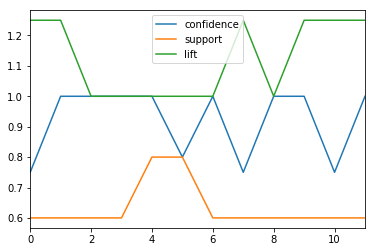

In [470]:
mxtend_rules[['confidence','support','lift']].plot()

We have 12 rules from the above.  Let's create more rules by reducing support and confidence thresholds to 20% and require lift to be 1.2.  

In [372]:
frequent_itemsets2 = apriori(df,min_support=.2,use_colnames=True)
mxtend_rules2=association_rules(frequent_itemsets2, metric='confidence',min_threshold=.2)
mxtend_rules2=mxtend_rules2[(mxtend_rules2['lift'] >= 1.2)]

In [388]:
mxtend_rules2['lift'].sort_values(ascending=False).head()

396     5.00
658     5.00
288     5.00
287     5.00
282     5.00
281     5.00
280     5.00
279     5.00
274     5.00
273     5.00
272     5.00
268     5.00
661     5.00
1014    5.00
1056    5.00
1262    5.00
664     5.00
667     5.00
1267    5.00
1268    5.00
1273    5.00
163     5.00
159     5.00
154     5.00
289     5.00
293     5.00
304     5.00
308     5.00
401     5.00
395     5.00
        ... 
764     1.25
1018    1.25
1013    1.25
233     1.25
1250    1.25
1010    1.25
1007    1.25
742     1.25
1004    1.25
224     1.25
221     1.25
748     1.25
399     1.25
753     1.25
216     1.25
214     1.25
213     1.25
212     1.25
211     1.25
999     1.25
1269    1.25
205     1.25
561     1.25
200     1.25
403     1.25
198     1.25
487     1.25
503     1.25
500     1.25
560     1.25
Name: lift, Length: 1080, dtype: float64

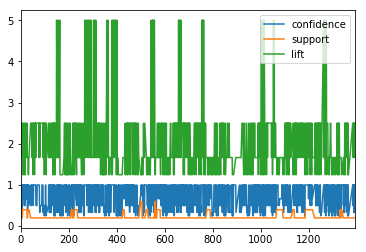

In [471]:
mxtend_rules2[['confidence','support','lift']].plot()

Notice above the presence of rules with lift values around 5.

Also, there are many confidence values around 1 due to the small size of the dataset, and small number of unique items across all transactions.  Observe the below two examples:

In [481]:
mxtend_rules.iloc[[1,4]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
4,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf


From the above, 

1.  Kidney Beans is in every transaction, so all confidence values with Kidney Beans as the consequent will equal 1: {Eggs} -> {Kidney Beans} has a confidence of 1. 
2. {Onions} -> {Eggs} has a confidence of 1 because eggs only occurs when onions occur, which is certainly more possible due to the small number of transactions (5).  

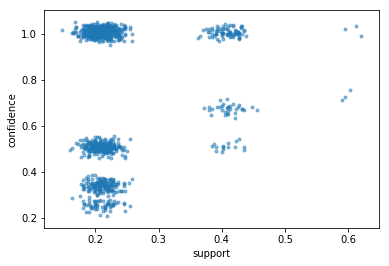

In [512]:
import random
import matplotlib.pyplot as plt

support=mxtend_rules2['support'].values
confidence=mxtend_rules2['confidence'].values
 
for i in range (len(mxtend_rules2)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker=".")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [2]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
           pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

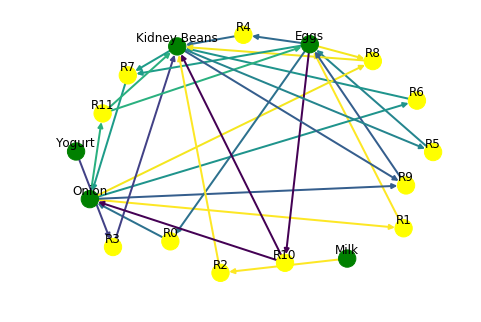

In [681]:
draw_graph(mxtend_rules,12)

### apyori library

In [347]:
apyori_results=list(apriori(data,min_support=.2,
                            min_confidence=.2,min_lift=1.2))
apyori_rules=pd.DataFrame(
columns=['antecedents','consequents','support','confidence','lift'])

for itemset in apyori_results:
    for rule in itemset[2]:
        apyori_rules=apyori_rules.append(
            pd.Series(
                  [[antecedent for antecedent in rule[0]],
                   [consequent for consequent in rule[1]],
                   itemset[1],
                   rule[2],
                   rule[3]],
                   index = temp.columns),
                   ignore_index=True)

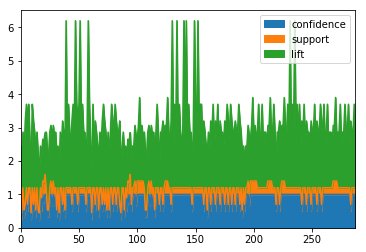

In [349]:
apyori_rules[['confidence','support','lift']].plot(kind='area')

In [236]:
'''
#print results
for results in apyori_rules:
    itemset=results[0]
    items=[x for x in itemset]
    for j in results[2]:
        print('Rule: {} -> {}'.format([x for x in j[0]],[x for x in j[1]]))
        print('Support: {}'.format(results[1]))
        print('Confidence: {}'.format(j[2]))
        print('Lift: {}'.format(j[3]))
        print('====================================')
'''

Rule: ['Apple'] -> ['Eggs']
Support: 0.2
Confidence: 1.0
Lift: 1.25
Rule: ['Eggs'] -> ['Apple']
Support: 0.2
Confidence: 0.25
Lift: 1.25
Rule: ['Apple'] -> ['Milk']
Support: 0.2
Confidence: 1.0
Lift: 1.66666666667
Rule: ['Milk'] -> ['Apple']
Support: 0.2
Confidence: 0.333333333333
Lift: 1.66666666667
Rule: ['Corn'] -> ['Ice cream']
Support: 0.2
Confidence: 0.5
Lift: 2.5
Rule: ['Ice cream'] -> ['Corn']
Support: 0.2
Confidence: 1.0
Lift: 2.5
Rule: ['Corn'] -> ['Unicorn']
Support: 0.2
Confidence: 0.5
Lift: 2.5
Rule: ['Unicorn'] -> ['Corn']
Support: 0.2
Confidence: 1.0
Lift: 2.5
Rule: ['Dill'] -> ['Eggs']
Support: 0.2
Confidence: 1.0
Lift: 1.25
Rule: ['Eggs'] -> ['Dill']
Support: 0.2
Confidence: 0.25
Lift: 1.25
Rule: ['Dill'] -> ['Nutmeg']
Support: 0.2
Confidence: 1.0
Lift: 2.5
Rule: ['Nutmeg'] -> ['Dill']
Support: 0.2
Confidence: 0.5
Lift: 2.5
Rule: ['Dill'] -> ['Onion']
Support: 0.2
Confidence: 1.0
Lift: 1.66666666667
Rule: ['Onion'] -> ['Dill']
Support: 0.2
Confidence: 0.333333333333
Li

The following blog posts are basically replicas of each other and feed improperly constructed list of lists, which contain NaN/None values to the algorithm which treats these as items.

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
https://medium.com/@deepak.r.poojari/apriori-algorithm-in-python-recommendation-engine-5ba89bd1a6da

In [76]:
df=pd.DataFrame(data)
df
df=np.asarray(df).tolist()
df

,0,1,2,3,4,5
0,Milk,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt
1,Dill,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt
2,Milk,Apple,Kidney Beans,Eggs,None,None
3,Milk,Unicorn,Corn,Kidney Beans,Yogurt,None
4,Corn,Onion,Onion,Kidney Beans,Ice cream,Eggs


[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs', None, None],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt', None],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

Check number of frequent itemsets and rules generated.  If these numbers seem too large or small, then adjust the support or confidence levels.

### Association Rules for Customer Segmentation

Association rule mining does not just have to be done for retail transactions.  Let's regard a transacation as just a row in a dataframe and apply our methods to explore segment associations.

In [3]:
cust=pd.read_csv("http://goo.gl/qw303p")

In [4]:
cust.head()

,age,gender,income,kids,ownHome,subscribe,Segment
0,47.316133,Male,49482.810438,2,ownNo,subNo,Suburb mix
1,31.386839,Male,35546.288300,1,ownYes,subNo,Suburb mix
2,43.200342,Male,44169.186377,0,ownYes,subNo,Suburb mix
3,37.316995,Female,81041.986385,1,ownNo,subNo,Suburb mix
4,40.954390,Female,79353.014443,3,ownYes,subNo,Suburb mix


In [9]:
cust=pd.read_csv("http://goo.gl/qw303p")
cust['age']=pd.cut(cust['age'],bins=[0,25,35,55,65,100],
                  labels=["19-24", "25-34", "35-54", "55-64", "65+"],
                  right=False) #(low,up) instead of (low,up]

cust['income']=pd.cut(cust['income'],
                      bins=(-100000, 40000, 70000, 1000000),
                      labels=('low','medium','high'),
                      right=False
                     )

cust['kids']=pd.cut(cust['kids'],bins=[-1, 1, 2, 3, 100], #(low,up)
                   labels=["No kids", "1 kid", "2 kids", "3+ kids"],
                    right=False)

In [14]:
cust_new=pd.get_dummies(cust)
cust_frequent_itemsets = apriori(cust_new,min_support=.1,
                                 use_colnames=True)
cust_rules=association_rules(cust_frequent_itemsets, 
                             metric='confidence',
                             min_threshold=.4)

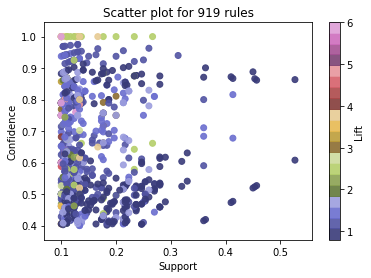

In [834]:
plt.scatter(cust_rules.support, cust_rules.confidence, 
            c=cust_rules.lift,alpha=.9,
           cmap=plt.cm.Vega20b)
plt.title('Scatter plot for {} rules'.format(len(cust_rules)))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(
).set_label("Lift", labelpad=+1)
plt.show(); #semi-colon hides unneeded output

The source text, R for Marketing Analytics, finds only 579 from this dataset.  It uses the apriori algorithm of the arules library in R, with min support=.1 and min confidence=.4.

In [15]:
cust_rules.head(2) #checking our rules, it does appear sup>.1,conf>.4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Segment_Suburb mix, age_35-54, income_medium)",(gender_Female),0.223333,0.523333,0.106667,0.477612,0.912634,-0.010211,0.912476
1,"(Segment_Suburb mix, age_35-54, gender_Female)",(income_medium),0.133333,0.610000,0.106667,0.800000,1.311475,0.025333,1.950000


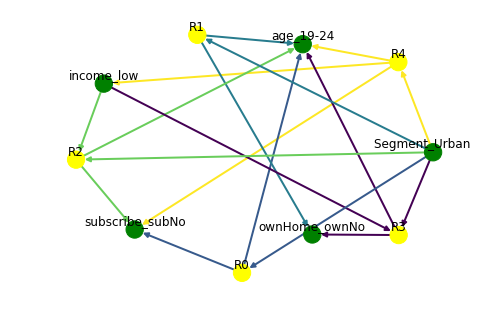

In [879]:
cust_rules_top=cust_rules.sort_values('lift',ascending=False)[:35]
draw_graph(cust_rules_top,5)

### Association Rule Clustering

According to the source below, association rule clustering has so far proven ineffective: michael.hahsler.net/research/misc/INFORMS2016_DM_clusteringAR.pdf 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred=kmeans.predict(finance_features)

In [130]:
cust_rules_top=cust_rules.sort_values('lift',ascending=False)[:100]
cust_rules_top['antecedents2']=cust_rules_top['antecedents'].str.join(sep=',')
cust_rules_top['consequents2']=cust_rules_top['consequents'].str.join(sep=',')
cust_rules_top['items'] = cust_rules_top[['antecedents2', 'consequents2']].apply(lambda x: ','.join(x), axis=1)
cust_rules_top['items'] =cust_rules_top['items'].str.split(',')
cust_rules_top_items=cust_rules_top['items'].str.join(sep='*').str.get_dummies(sep='*')

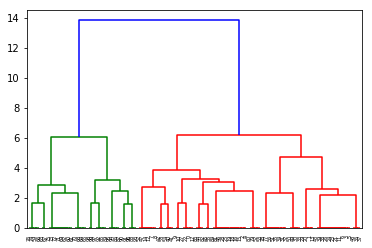

In [131]:
from sklearn.cluster import AgglomerativeClustering #Hierarchical
import scipy.cluster.hierarchy as sch
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(cust_rules_top_items, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(cust_rules_top_items)

### Grouping association rules using r's arules package

add argument contriburl to the inputs 

In [185]:
import rpy2
import rpy2.robjects as RObjects
from rpy2.robjects.packages import importr
utils = importr("utils")

In [184]:
utils.install_packages('arules',
        contriburl = 'https://cran.cnr.berkeley.edu')

/Users/Work/anaconda/envs/ipykernel_py3/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  unable to access index for repository https://cran.cnr.berkeley.edu:
  internet routines cannot be loaded

  warnings.warn(x, RRuntimeWarning)


rpy2.rinterface.NULL

In [180]:
utils.install_packages?

In [178]:
from rpy2 import *
rpy2.interactive as r
r.importr("utils")
package_name = "arules"
r.packages.utils.install_packages(package_name)
myPackage = importr("arules")

SyntaxError: invalid syntax (<ipython-input-178-307a3e18a88d>, line 2)

In [167]:
utils.chooseCRANmirror(ind=2)

rpy2.rinterface.NULL

In [173]:
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
R = rpy2.robjects.r
DTW = importr('arules')   # our package

/Users/Work/anaconda/envs/ipykernel_py3/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/Work/anaconda/envs/ipykernel_py3/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/Work/anaconda/envs/ipykernel_py3/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/Users/Work/anaconda/envs/ipykernel_py3/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In download.file(url, destfile = f, quiet = TRUE) :
  warnings.warn(x, RRuntimeWarning)
/Users/Work/anaconda/envs/ipykernel_py3/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/Users/Work/anaconda/envs/ipykernel_py3/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  unable to load shar

RRuntimeError: Error in loadNamespace(name) : there is no package called ‘arules’
